In [211]:
import numpy as np
import pandas as pd

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
df = pd.read_csv('./data/911.csv')

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [215]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [216]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [217]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [218]:
df['title'].nunique()

110

In [219]:
df['Reason'] = df['title'].apply(lambda x: x.split(":", 1)[0])

In [220]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

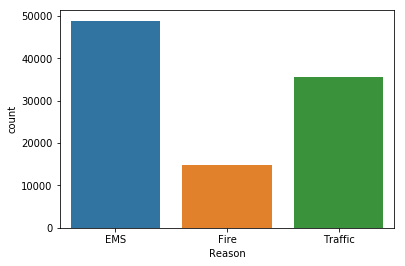

In [221]:
sns.countplot(x=df['Reason'], data=df)

In [222]:
df['timeStamp'].dtype

dtype('O')

In [223]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [224]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [225]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

In [226]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [227]:
df['Day of Week'] = df['timeStamp'].apply(lambda x: dmap[x.weekday()])

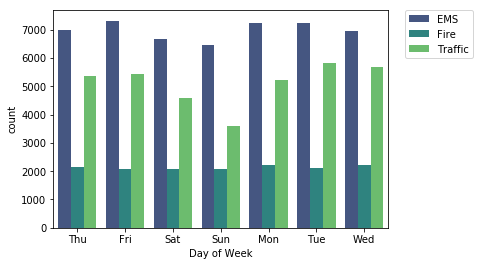

In [254]:
sns.countplot(x=df['Day of Week'], data=df, hue="Reason", palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

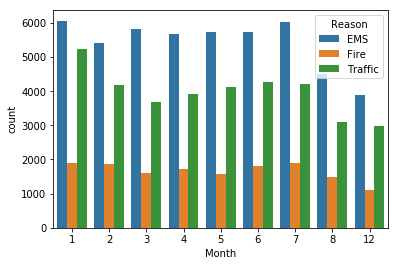

In [229]:
sns.countplot(x=df['Month'], data=df, hue="Reason")

In [230]:
byMonth = df.groupby('Month').count()

In [231]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [232]:
byMonth['Count'] = byMonth['timeStamp']

Text(0,0.5,'Count')

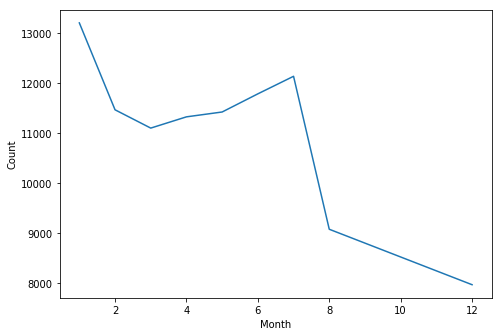

In [233]:
fig = plt.figure()
new_axes = fig.add_axes([0,0,1,1])
new_axes.plot(byMonth.index, byMonth['Count'])
new_axes.set_xlabel('Month')
new_axes.set_ylabel('Count')

In [234]:
byMonth['Month'] = byMonth.index

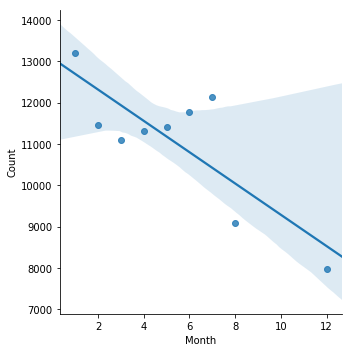

In [235]:
sns.lmplot(x='Month', y='Count', data=byMonth)

In [236]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [237]:
byDate = df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


In [238]:
byDate['Count'] = byDate['timeStamp']

Text(0,0.5,'Count')

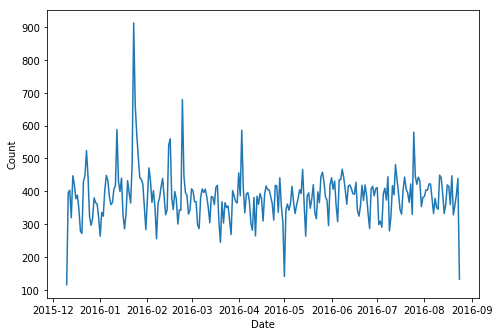

In [239]:
fig = plt.figure()
new_axes = fig.add_axes([0,0,1,1])
new_axes.plot(byDate.index, byDate['Count'])
new_axes.set_xlabel('Date')
new_axes.set_ylabel('Count')

In [240]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [241]:
reason_pivot = pd.pivot_table(df, values='timeStamp', index=['Date'], 
                              columns=['Reason'], aggfunc=lambda x: len(x))

In [242]:
reason_pivot.head()

Reason,EMS,Fire,Traffic
Date,,,
2015-12-10,57,15,43
2015-12-11,186,69,141
2015-12-12,189,68,146
2015-12-13,190,51,78
2015-12-14,222,39,186


Text(0.5,1,'Traffic')

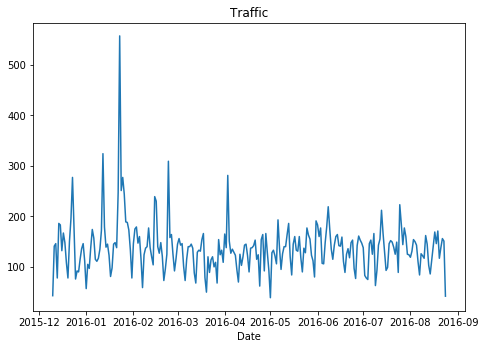

In [243]:
traffic = reason_pivot['Traffic']
fig = plt.figure()
new_axes = fig.add_axes([0,0,1,1])
new_axes.plot(traffic.index, traffic.values)
new_axes.set_xlabel('Date')
new_axes.set_title('Traffic')

Text(0.5,1,'Traffic')

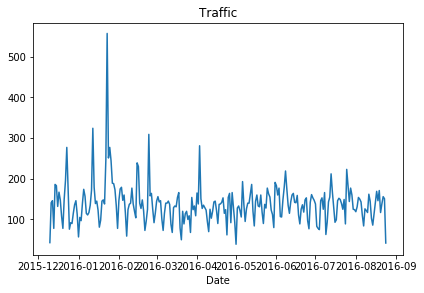

In [261]:
traffic.plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5,1,'Fire')

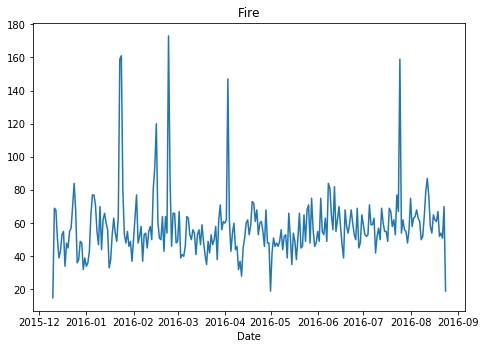

In [244]:
fire = reason_pivot['Fire']
fig = plt.figure()
new_axes = fig.add_axes([0,0,1,1])
new_axes.plot(fire.index, fire.values)
new_axes.set_xlabel('Date')
new_axes.set_title('Fire')

Text(0.5,1,'EMS')

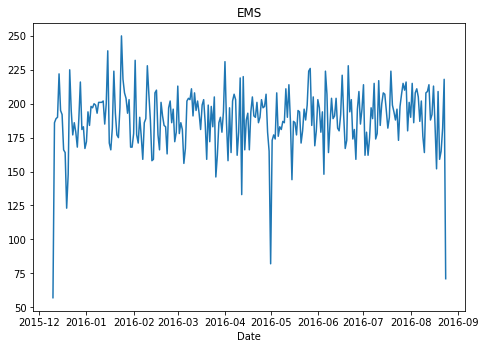

In [245]:
EMS = reason_pivot['EMS']
fig = plt.figure()
new_axes = fig.add_axes([0,0,1,1])
new_axes.plot(EMS.index, EMS.values)
new_axes.set_xlabel('Date')
new_axes.set_title('EMS')

In [246]:
day_pivot = pd.pivot_table(df, values='timeStamp', index=['Day of Week'], 
                              columns=['Hour'], aggfunc=lambda x: len(x))

In [247]:
day_pivot.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


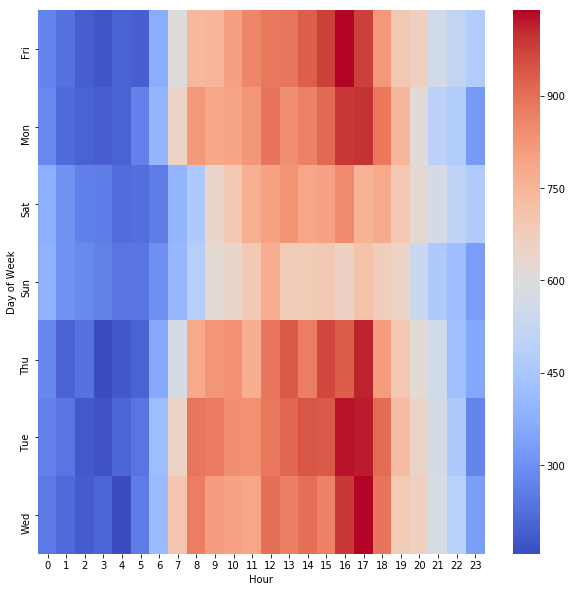

In [248]:
plt.figure(figsize=(10,10))
sns.heatmap(day_pivot, cmap='coolwarm')

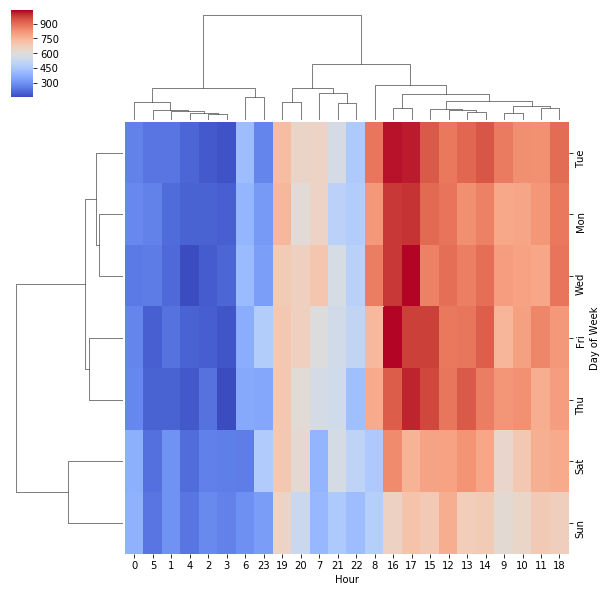

In [249]:
sns.clustermap(day_pivot, cmap='coolwarm')

In [250]:
month_pivot = pd.pivot_table(df, values='timeStamp', index=['Day of Week'], 
                              columns=['Month'], aggfunc=lambda x: len(x))

In [251]:
month_pivot.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


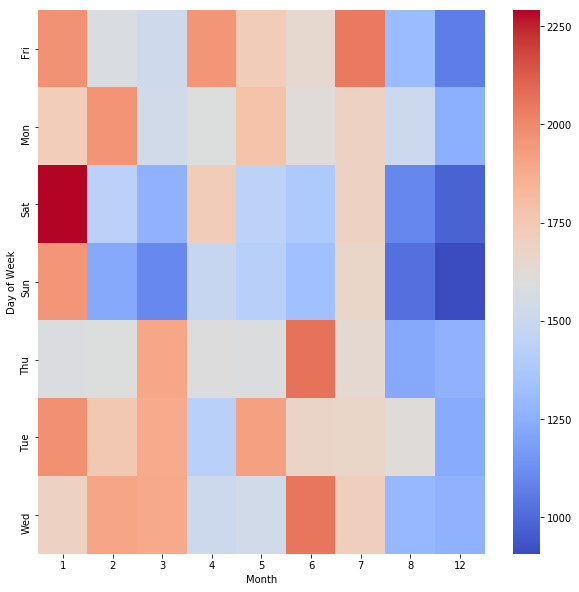

In [252]:
plt.figure(figsize=(10,10))
sns.heatmap(month_pivot, cmap='coolwarm')

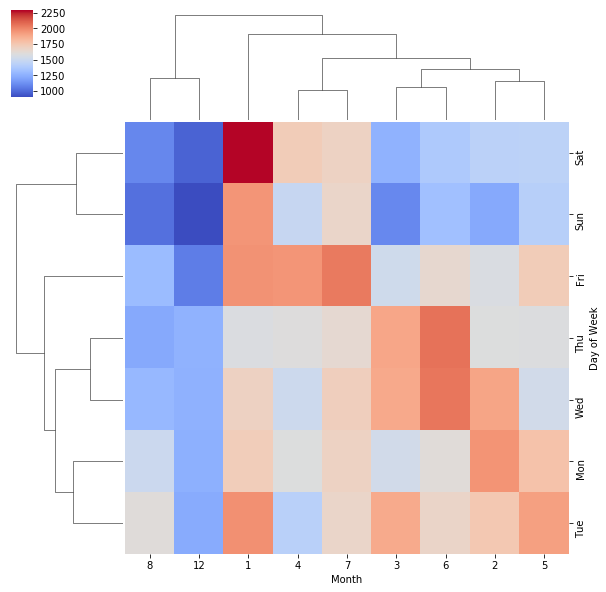

In [253]:
sns.clustermap(month_pivot, cmap='coolwarm')